<a href="https://colab.research.google.com/github/Nath96/Capstone-Project-Modul-3/blob/main/CapstoneProject_Module3_Klasifikasi_Travel_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travel Insurance Analytics

## Business Problem Understanding

**Context**  

Sebuah perusahaan pihak ketiga menawarkan jasa asuransi perjalanan berbasis di Singapura. Asuransi perjalanan adalah jenis asuransi yang menanggung biaya dan kerugian yang terkait dengan perjalanan. Ini adalah perlindungan yang berguna bagi mereka yang bepergian di dalam negeri atau di luar negeri.

Terdapat 2 tipe agensi yaitu Travel Agency dan Airlines, dengan 26 produk atau paket sehingga memberikan pilihan kepada konsumen untuk membeli asuransi perjalanan

Banyak faktor yang mempengaruhi klaim pada setiap polis asuransi. Tentunya hal tersebut perlu dipahami juga oleh agency karena berhubungan dengan profit yang bisa didapatkan.


Target :

0 :  Tidak mengajukan klaim

1 :  Mengajukan klaim

**Problem Statement :**

Perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat tertanggung mengklaim polis. 

**Goals :**

Perusahaan ingin memiliki kemampuan untuk memprediksi apakah polis asuransi diklaim berdasarkan beberapa fitur sehingga dapat menjadi pertimbangan bagi perusahaan untuk menawarkan produk yang tepat dan memaksimalkan Keuntungan. 


**Analytic Approach :**

Menganalisis data untuk menemukan pola yang membedakan tertanggung mengklaim polis dan yang tidak mengklaim.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang tertanggung mengklaim atau tidak.

## Data Understanding

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Agency | Object | Name of agency |
| Agency Type | Object | Type of travel insurance agencies |
| Distribution Channel | Object | Distribution channel of travel insurance agencies|
| Product Name | Object | Name of the travel insurance products  |
| Gender | Object | Gender of insured |
| Duration | Integer | Duration of travel  |
| Destination | Object | Destination of travel |
| Net Sales| Float | Amount of sales of travel insurance policies |
| Commision (in value) | Float | Commission received for travel insurance agency|
| Age | Integer | Age of insured|
| Claim | Object | Claim Status |

<br>
Dari info tersebut, kita tahu bahwa ada 4 kolom numerik dan 7 kategori


In [ ]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization
import pandas as pd
import numpy as np
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

# Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb


# Imbalance Dataset
from imblearn.over_sampling import SMOTE 

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
#Load Dataset
df = pd.read_csv('data_travel_insurance.csv') 
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [ ]:
df.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

In [ ]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency_Type           44328 non-null  object 
 2   Distribution_Channel  44328 non-null  object 
 3   Product_Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net_Sales             44328 non-null  float64
 8   Commision             44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


## Data Cleaning



In [ ]:
#Check Missing Value
df.isnull().sum().any

<bound method NDFrame._add_numeric_operations.<locals>.any of Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Gender                  31647
Duration                    0
Destination                 0
Net_Sales                   0
Commision                   0
Age                         0
Claim                       0
dtype: int64>

Banyak data yang hilang/kosong di fitur 'Gender'. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data-data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

Jika ditinjau berdasar domain knowledge, fitur 'Gender' tidak memiliki relevansi dan kepentingan untuk analisis prediktif ataupun untuk membangun model prediktif 

In [ ]:
df=df.drop(['Gender'], axis=1)
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


## Data Analysis

Untuk lebih memahami data di setiap kolom, mari buat daftar nilai unik dari setiap kolom.

In [ ]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Unique values of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

Unique values of Agency are: 
['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'SSI' 'RAB' 'KML' 'TST' 'TTW'
 'JWT' 'ADM' 'CCR' 'CBH']

Unique values of Agency_Type are: 
['Airlines' 'Travel Agency']

Unique values of Distribution_Channel are: 
['Online' 'Offline']

Unique values of Product_Name are: 
['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector' 'Travel Cruise Protect'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Gold Plan' 'Annual Gold Plan' 'Child Comprehensive Plan' 'Premier Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Platinum' 'Spouse or Parents Comprehensive Plan'
 'Travel Cruise Protect Family']

Unique values of Destination are: 
['SINGAPORE' 'MALAYS

#### Number of Claim 

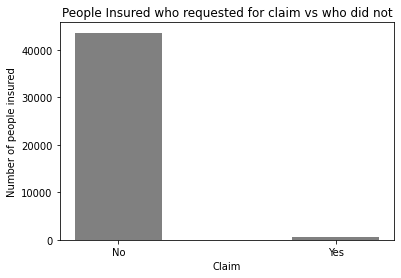

In [ ]:
df_claims = df.groupby(by=["Claim"]).size().reset_index(name="counts")
plt.bar(df_claims['Claim'], df_claims['counts'], color ='grey',width = 0.4)
plt.xlabel("Claim")
plt.ylabel("Number of people insured")
plt.title("People Insured who requested for claim vs who did not")
plt.show()

In [ ]:
results = df["Claim"].value_counts(dropna=False)
results

No     43651
Yes      677
Name: Claim, dtype: int64

In [ ]:
print("Percentage of claims that are Yes: " , results[1]/(results[0] + results[1]))

Percentage of claims that are Yes:  0.01527251398664501


Terlihat dari Bar Plot tersebut, bahwa  677 individu yang mengajukan klaim, sekitar 1,5% dari seluruh pemegang polis.

#### Age Distribution

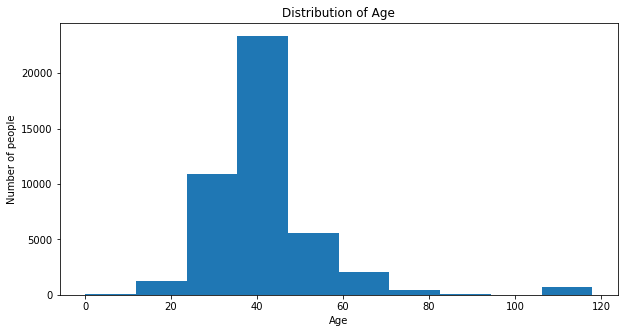

In [ ]:
# histogram of age distribution
fig = plt.figure(figsize = (10, 5))
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")
plt.show()

Dari grafik tersebut, mayoritas orang yang memilih asuransi perjalanan berusia 35 hingga 50 tahun.

#### Insurance Agencies 

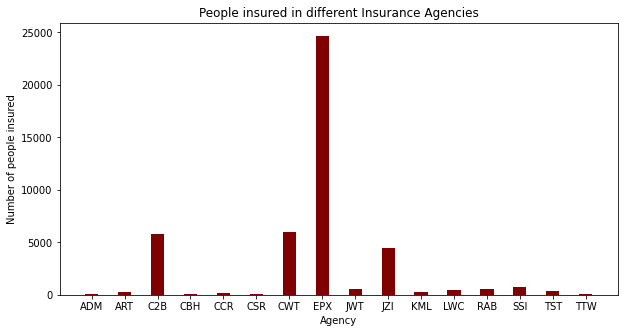

In [ ]:
df2 = df.groupby(by=["Agency"]).size().reset_index(name="counts")
fig = plt.figure(figsize = (10, 5))
plt.bar(df2['Agency'], df2['counts'], color ='maroon', width = 0.4)
plt.xlabel("Agency")
plt.ylabel("Number of people insured")
plt.title("People insured in different Insurance Agencies")
plt.show()

Mayoritas orang diasuransikan di bawah agen EPX.

#### Where are most claims coming from?

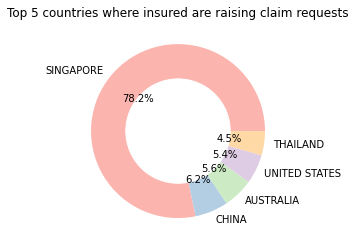

In [ ]:
df5=df.loc[df['Claim']=='Yes']
df6= df5.groupby(by=["Destination"]).size().reset_index(name="counts")
df7=df6.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df7['counts'], labels=df7['Destination'], autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
plt.title('Top 5 countries where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Jumlah klaim tertinggi berasal dari Singapura, jumlah klaim dari Singapura sekitar 4 kali lebih besar dari gabungan semua negara lain.

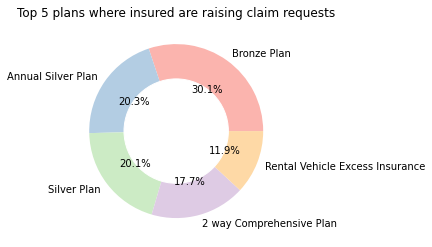

In [ ]:
df8= df5.groupby(by=["Product_Name"]).size().reset_index(name="counts")
df9=df8.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df9['counts'], labels=df9['Product_Name'], autopct='%1.1f%%',colors=Pastel1_7.hex_colors)
plt.title('Top 5 plans where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The Bronze and Annual Silver plans merupakan setengah dari semua klaim.


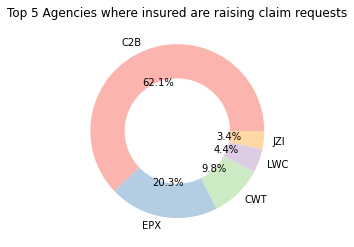

In [ ]:
df10= df5.groupby(by=["Agency"]).size().reset_index(name="counts")
df11=df10.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df11['counts'], labels=df11['Agency'], autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
plt.title('Top 5 Agencies where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Sebagian besar klaim datang dari dua agensi, C2B dan EPX.

#### Mari kita periksa beberapa fitur

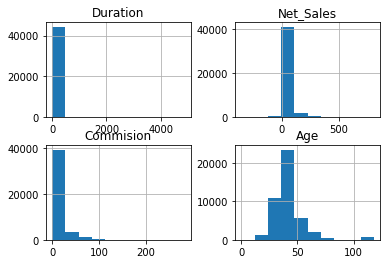

In [ ]:
hist=df.hist()


In [ ]:
df.describe()


,Duration,Net_Sales,Commision,Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


#### Duration of Trip
Ada beberapa nilai negatif yang perlu dihilangkan, yaitu Duration dan Net_Sales


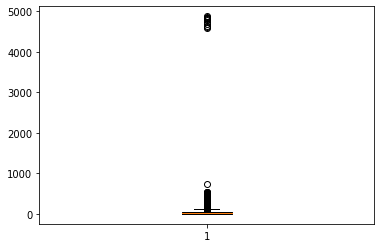

In [ ]:
fig = plt.figure(figsize =(6,4 ))
plt.boxplot(df['Duration'])
plt.show()

index_duration = df[df['Duration'] < 0 ].index
df.drop(index_duration, inplace = True)

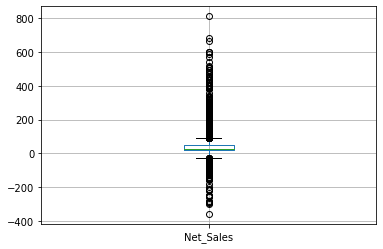

In [ ]:
boxplot1 = df.boxplot(column=['Net_Sales'])

Nilai-nilai negatif sudah disingkirkan.

In [ ]:
df["Agency"].value_counts(dropna=False)

EPX    24656
CWT     5980
C2B     5753
JZI     4431
SSI      765
JWT      522
RAB      513
LWC      455
TST      354
KML      281
ART      229
CCR      126
TTW       69
CBH       69
CSR       68
ADM       55
Name: Agency, dtype: int64

In [ ]:
df["Agency_Type"].value_counts(dropna=False)

Travel Agency    32113
Airlines         12213
Name: Agency_Type, dtype: int64

In [ ]:
df["Distribution_Channel"].value_counts(dropna=False)

Online     43570
Offline      756
Name: Distribution_Channel, dtype: int64

Di bawah ini kami mencari kemungkinan hubungan antara fitur yang berbeda

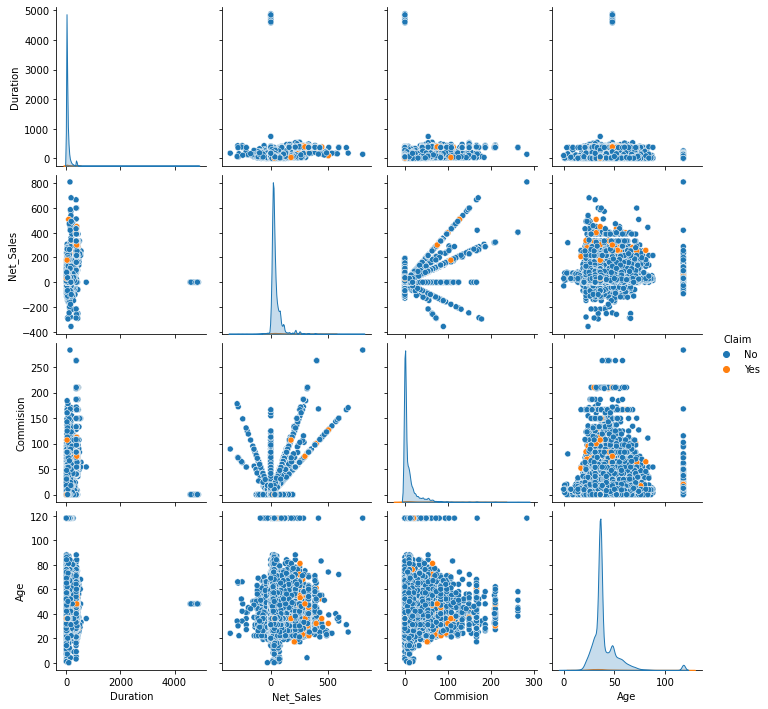

In [ ]:
sns.pairplot(df, hue="Claim")

Terlihat ada hubungan linier yang kuat antara Net_Sales dan Komisi

#### Correlation Map

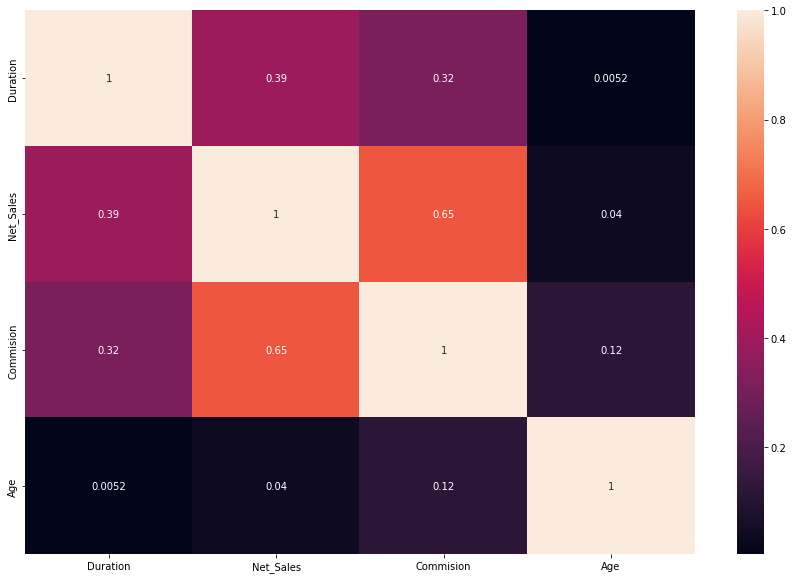

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)

Kita bisa gunakan argumen annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi



## Data Preparation 

In [ ]:
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


**One-Hot Encoding for feature engineering**

In [ ]:
from sklearn import preprocessing

label_encoder1 = preprocessing.LabelEncoder()
df['Agency']= label_encoder1.fit_transform(df['Agency'])
  
label_encoder2 = preprocessing.LabelEncoder()
df['Agency_Type']= label_encoder2.fit_transform(df['Agency_Type'])

label_encoder3 = preprocessing.LabelEncoder()
df['Distribution_Channel']= label_encoder3.fit_transform(df['Distribution_Channel'])

label_encoder4 = preprocessing.LabelEncoder()
df['Product_Name']= label_encoder4.fit_transform(df['Product_Name'])

label_encoder5 = preprocessing.LabelEncoder()
df['Claim']= label_encoder5.fit_transform(df['Claim'])

label_encoder6 = preprocessing.LabelEncoder()
df['Destination']= label_encoder6.fit_transform(df['Destination'])



In [ ]:
df

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim
0,2,0,1,4,365,110,216.0,54.00,57,0
1,7,1,1,10,4,74,10.0,0.00,33,0
2,9,0,1,8,19,52,22.0,7.70,26,0
3,7,1,1,1,20,130,112.0,0.00,59,0
4,2,0,1,9,8,110,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
44323,7,1,1,1,14,23,30.0,0.00,36,1
44324,6,1,1,16,17,3,79.2,47.52,47,0
44325,14,1,0,23,64,120,30.0,10.50,50,0
44326,7,1,1,1,51,23,36.0,0.00,36,0


#### Correlation Map
Mari buat peta korelasi dengan semua fitur.

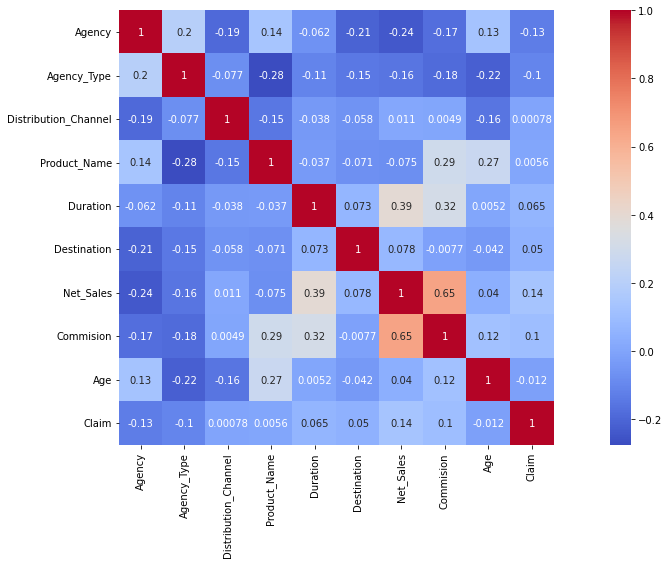

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), square=True,annot=True,cmap= 'coolwarm')

Tidak ada kolinearitas signifikan yang diamati.

**Preparing features for training and testing**


In [ ]:
y=df.iloc[:,[-1]]
X=df.drop(y.columns,axis = 1)

In [ ]:
y

,Claim
0,0
1,0
2,0
3,0
4,0
...,...
44323,1
44324,0
44325,0
44326,0


In [ ]:
X

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age
0,2,0,1,4,365,110,216.0,54.00,57
1,7,1,1,10,4,74,10.0,0.00,33
2,9,0,1,8,19,52,22.0,7.70,26
3,7,1,1,1,20,130,112.0,0.00,59
4,2,0,1,9,8,110,16.0,4.00,28
...,...,...,...,...,...,...,...,...,...
44323,7,1,1,1,14,23,30.0,0.00,36
44324,6,1,1,16,17,3,79.2,47.52,47
44325,14,1,0,23,64,120,30.0,10.50,50
44326,7,1,1,1,51,23,36.0,0.00,36


**Addressing the inbalance in the data**


In [ ]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')
print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (44326, 9)
Shape of X after SMOTE: (87298, 9)

Balance of positive and negative classes (%):


Claim
0        50.0
1        50.0
dtype: float64

**Scale features (0 to 1)**


In [ ]:
X_new=pd.DataFrame()
to_scale = X_sm.columns
mms = MinMaxScaler()
X_new[to_scale] = mms.fit_transform(X_sm[to_scale])
X_new.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age
0,0.133333,0.0,1.0,0.16,0.074780,0.802920,0.491221,0.190476,0.483051
1,0.466667,1.0,1.0,0.40,0.000820,0.540146,0.314775,0.000000,0.279661
2,0.600000,0.0,1.0,0.32,0.003893,0.379562,0.325054,0.027160,0.220339
3,0.466667,1.0,1.0,0.04,0.004098,0.948905,0.402141,0.000000,0.500000
4,0.133333,0.0,1.0,0.36,0.001639,0.802920,0.319914,0.014109,0.237288


## Modeling & Evaluation

 **Train/Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_sm, test_size=0.25, random_state=42)

**Train a Random Forest Classifier**
<br> Metode ini digunakan terutama karena tidak ada kolinearitas yang kuat antara fitur dalam dataset.

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Karena kami mendapatkan kesalahan di atas, kami akan mengubah y kami menjadi vektor menggunakan ravel() seperti yang disarankan.

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

**Testing and Accuracy**

Accuracy = 0.97
Recall = 0.98



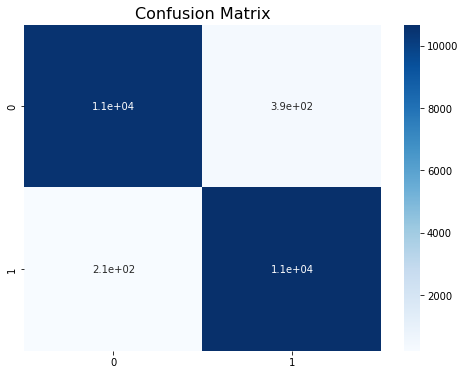

In [ ]:
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## Conclusion 

Meskipun tampaknya ada akurasi yang tinggi, saya menduga ada overfitting yang dapat diatur (untuk Random Forests) dengan mengoptimalkan turning parameter yang mengatur jumlah fitur yang dipilih secara acak untuk menumbuhkan setiap pohon dari data yang di-boot. 

Pendekatan pertama saya adalah k-fold cross validation di mana K berada di antara 5 dan 10, 

saya akan memilih turning parameter yang meminimalkan kesalahan prediksi sampel uji. 

Pendekatan lain yang mungkin adalah menumbuhkan ukuran Random Forests, namun saya perlu melangkah dengan ringan karena Random Forests umumnya sulit untuk dipasangkan.

#### Test Oversampling with K-Fold Cross Validation

In [ ]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)